# ----------------------------------------------------------
# LDA
# ----------------------------------------------------------

In [92]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')


In [93]:
import configparser
config = configparser.ConfigParser()
config.read('../../../env.ini')

[]

In [94]:
colors = "YlGnBu"

In [95]:
ngram_range = (1, 2)
n_terms = 4000
n_topics = 40
max_iter = 20
n_top_terms = 9

In [96]:
OHCO = ['artist', 'song','lines', 'token_num']
WORDS = OHCO[:4]
LINES = OHCO[:3]
SONG = OHCO[:2]
ARTIST = OHCO[:1]

In [97]:
BAG = SONG

In [98]:
TOKENS = pd.read_csv('tokens.csv')
TOKENS

,artist,song,lines,token_num,pos_tuple,pos,token_str,term_str,pos_group
0,ADELE,Hello,0,0,"('To', 'TO')",TO,To,to,TO
1,ADELE,Hello,0,1,"('go', 'VB')",VB,go,go,VB
2,ADELE,Hello,0,2,"('over', 'RP')",RP,over,over,RP
3,ADELE,Hello,0,3,"('everything', 'NN')",NN,everything,everything,NN
4,ADELE,Hello,1,0,"('They', 'PRP')",PRP,They,they,PR
...,...,...,...,...,...,...,...,...,...
93445,WHITNEY HOUSTON,Call You Tonight,46,13,"('(', '(')",(,(,NaN,(
93446,WHITNEY HOUSTON,Call You Tonight,46,14,"('Oh', 'UH')",UH,Oh,oh,UH
93447,WHITNEY HOUSTON,Call You Tonight,46,15,"(',', ',')",",",",",NaN,","
93448,WHITNEY HOUSTON,Call You Tonight,46,16,"('baby', 'NN')",NN,baby,baby,NN


In [99]:
BAG

['artist', 'song']

## Filtering For Nouns and Verbs

In [100]:
TOKENS['term_str'] = TOKENS['term_str'].astype(str)
pos_pattern = r'^(NN|VB|NNS|VBZ)'
DOCS = TOKENS[TOKENS.pos.str.match(pos_pattern)]\
    .groupby(BAG).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [101]:
DOCS.head()

doc_str
artist song                                                                
ADELE  All I Ask          ve been said know do play pretend re scared is...
       Best for Last      s been open yours baby come m trying tell like...
       Can I Get It       beg steal borrow make make heart home throw wa...
       Chasing Pavements  m am do need look ai know is tell world say wa...
       Cold Shoulder      say s head things think do make sense been do ...

## Create Vector Space

In [102]:
count_engine = CountVectorizer(max_features=n_terms, ngram_range=ngram_range, stop_words='english')
count_model = count_engine.fit_transform(DOCS.doc_str)
TERMS = count_engine.get_feature_names_out()

In [103]:
VOCAB = pd.DataFrame(index=TERMS)
VOCAB.index.name = 'term_str'

In [104]:
DTM = pd.DataFrame(count_model.toarray(), index=DOCS.index, columns=TERMS)

In [105]:
DTM

aah  abel  abel abel  ablaze  \
artist          song                                                     
ADELE           All I Ask                   0     0          0       0   
                Best for Last               0     0          0       0   
                Can I Get It                0     0          0       0   
                Chasing Pavements           0     0          0       0   
                Cold Shoulder               0     0          0       0   
...                                       ...   ...        ...     ...   
WHITNEY HOUSTON Who Would Imagine a King    0     0          0       0   
                Why Does It Hurt So Bad     0     0          0       0   
                You Give Good Love          0     0          0       0   
                You Light Up My Life        0     0          0       0   
                You Were Loved              0     0          0       0   

                                          acrobat  acrobat karma  admit  \
artist          song                                                      
ADELE           All I Ask                       0              0      0   
                Best for Last                   0              0      0   
                Can I Get It                    0              0      0   
                Chasing Pavements               0              0      0   
                Cold Shoulder                   0              0      0   
...                                           ...            ...    ...   
WHITNEY HOUSTON Who Would Imagine a King        0              0      0   
                Why Does It Hurt So Bad         0              0      1   
                You Give Good Love              0              0      0   
                You Light Up My Life            0              0      0   
                You Were Loved                  0              0      0   

                                          advice  advice feeling  affair  ...  \
artist          song                                                      ...   
ADELE           All I Ask                      0               0       0  ...   
                Best for Last                  0               0       0  ...   
                Can I Get It                   0               0       0  ...   
                Chasing Pavements              0               0       0  ...   
                Cold Shoulder                  0               0       0  ...   
...                                          ...             ...     ...  ...   
WHITNEY HOUSTON Who Would Imagine a King       0               0       0  ...   
                Why Does It Hurt So Bad        0               0       0  ...   
                You Give Good Love             0               0       0  ...   
                You Light Up My Life           0               0       0  ...   
                You Were Loved                 0               0       0  ...   

                                          yeaheheh  yeaheheh love  \
artist          song                                                
ADELE           All I Ask                        0              0   
                Best for Last                    0              0   
                Can I Get It                     0              0   
                Chasing Pavements                0              0   
                Cold Shoulder                    0              0   
...                                            ...            ...   
WHITNEY HOUSTON Who Would Imagine a King         0              0   
                Why Does It Hurt So Bad          0              0   
                You Give Good Love               0              0   
                You Light Up My Life             0              0   
                You Were Loved                   0              0   

                                          yeaheheh ruin  year  year santa  \
artist          song                                                      

In [106]:
VOCAB['doc_count'] = DTM.astype('bool').astype('int').sum()
DOCS['term_count'] = DTM.sum(1)

In [107]:
VOCAB


,doc_count
term_str,
aah,1
abel,1
abel abel,1
ablaze,2
acrobat,1
...,...
years,16
yee,3
yesterday,3


In [108]:
DOCS.term_count.describe()


count    460.000000
mean      75.121739
std      107.653778
min        0.000000
25%        1.000000
50%        2.000000
75%      133.000000
max      764.000000
Name: term_count, dtype: float64

## Generate Model

In [109]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)
TNAMES = [f"T{str(x).zfill(len(str(n_topics)))}" for x in range(n_topics)]

## THETA

In [110]:
lda_model = lda_engine.fit_transform(count_model)

In [111]:
THETA = pd.DataFrame(lda_model, index=DOCS.index)
THETA.columns.name = 'topic_id'
THETA.columns = TNAMES

In [112]:
THETA.sample(10).T.style.background_gradient(cmap=colors, axis=None)

In [113]:
csv_file = 'theta.csv'
THETA.to_csv('theta.csv')

## PHI

In [63]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name = 'term_str'

In [64]:
PHI.T.sample(10).style.background_gradient(cmap=colors, axis=None)

topic_id,T00,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
think think,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.025000,0.025000,3.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
heart makes,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,3.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
say got,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,3.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000
tell santa,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,6.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
leaves,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,3.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
heels love,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,4.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
orbit know,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,3.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
matters,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,3.025000,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
face gorgeous,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,3.025000,0.025000,0.025000,0.025000,0.025000


In [65]:
csv_file = 'phi.csv'
PHI.to_csv('phi.csv')

## Create TOPICS and get Top Terms per Topic

In [66]:
TOPICS = PHI.stack().groupby('topic_id')\
    .apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).reset_index().term_str))\
    .to_frame('top_terms')
TOPICS

,top_terms
topic_id,
T00,ayy ayy ayy sheesh sweetener river lea river l...
T01,love ooh wait wait love wan trust say know goo...
T02,shake shake shake gon fake tears dry play tear...
T03,ahooh san west got lost mind waste time waste ...
T04,ai ava tears ai love love risk risk know got a...
T05,told say baby told told shit say shit chest sh...
T06,run run hands hands hair hair hands saving lov...
T07,look love look look knew say time got know said
T08,know love tell hear come day know know day com...


## Sorting Topics By Mean Doc Weights

In [67]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()
TOPICS['mean_document_weight'] = TOPICS['doc_weight_sum']/sum(TOPICS['doc_weight_sum'])


In [68]:
TOPICS.sort_values('mean_document_weight', ascending=False).style.background_gradient(cmap=colors)

,top_terms,doc_weight_sum,term_freq,mean_document_weight
topic_id,,,,
T09,know somethin way need ima time got home space,18.494606,0.057829,0.040206
T21,dance night wan imagine somebody ve hurts wan dance got,17.019690,0.037405,0.036999
T35,love say day ve save save day got love save feel,16.467570,0.043843,0.035799
T28,shoop shoo love shoop shoop doop lights baby shoo doop know,15.998972,0.037924,0.034780
T18,know love gon leave got said ooh ve nan,15.718294,0.038830,0.034170
T07,look love look look knew say time got know said,15.697957,0.032492,0.034126
T08,know love tell hear come day know know day come hear hear,15.603362,0.020896,0.033920
T13,love love love thank want thank thank ve want love love want hands,15.282899,0.018347,0.033224
T19,baby rumour rumour rumour know ve time let love ai,14.933689,0.054607,0.032465


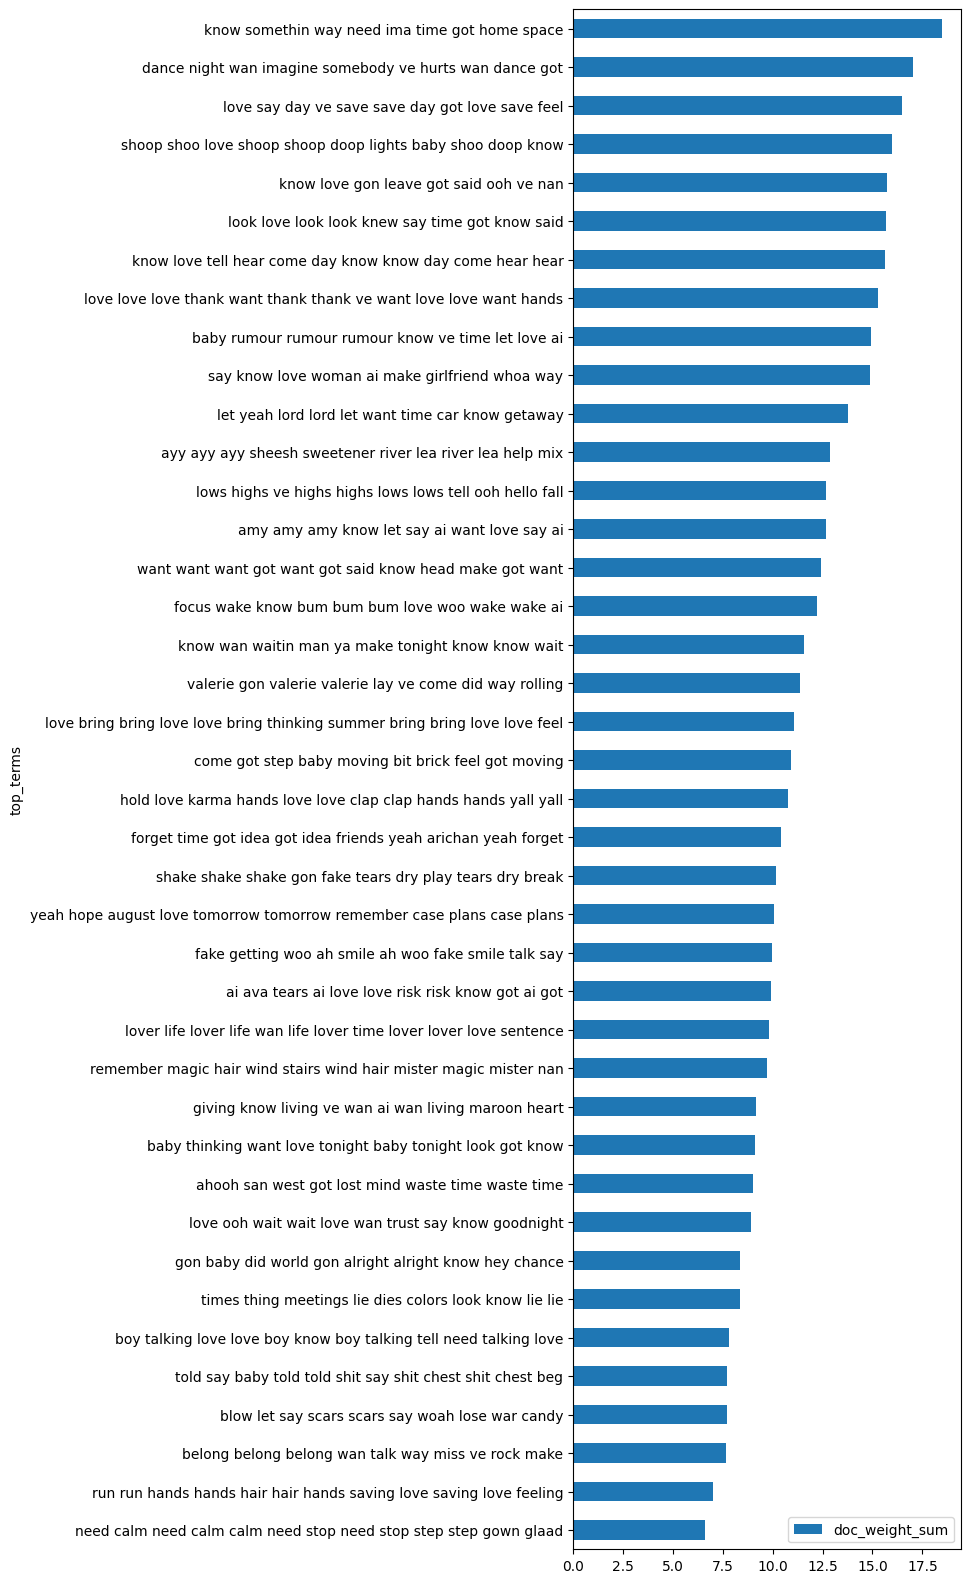

In [69]:
TOPICS.sort_values('mean_document_weight', ascending=True).plot.barh(y='doc_weight_sum', x='top_terms', figsize=(5, n_topics/2));

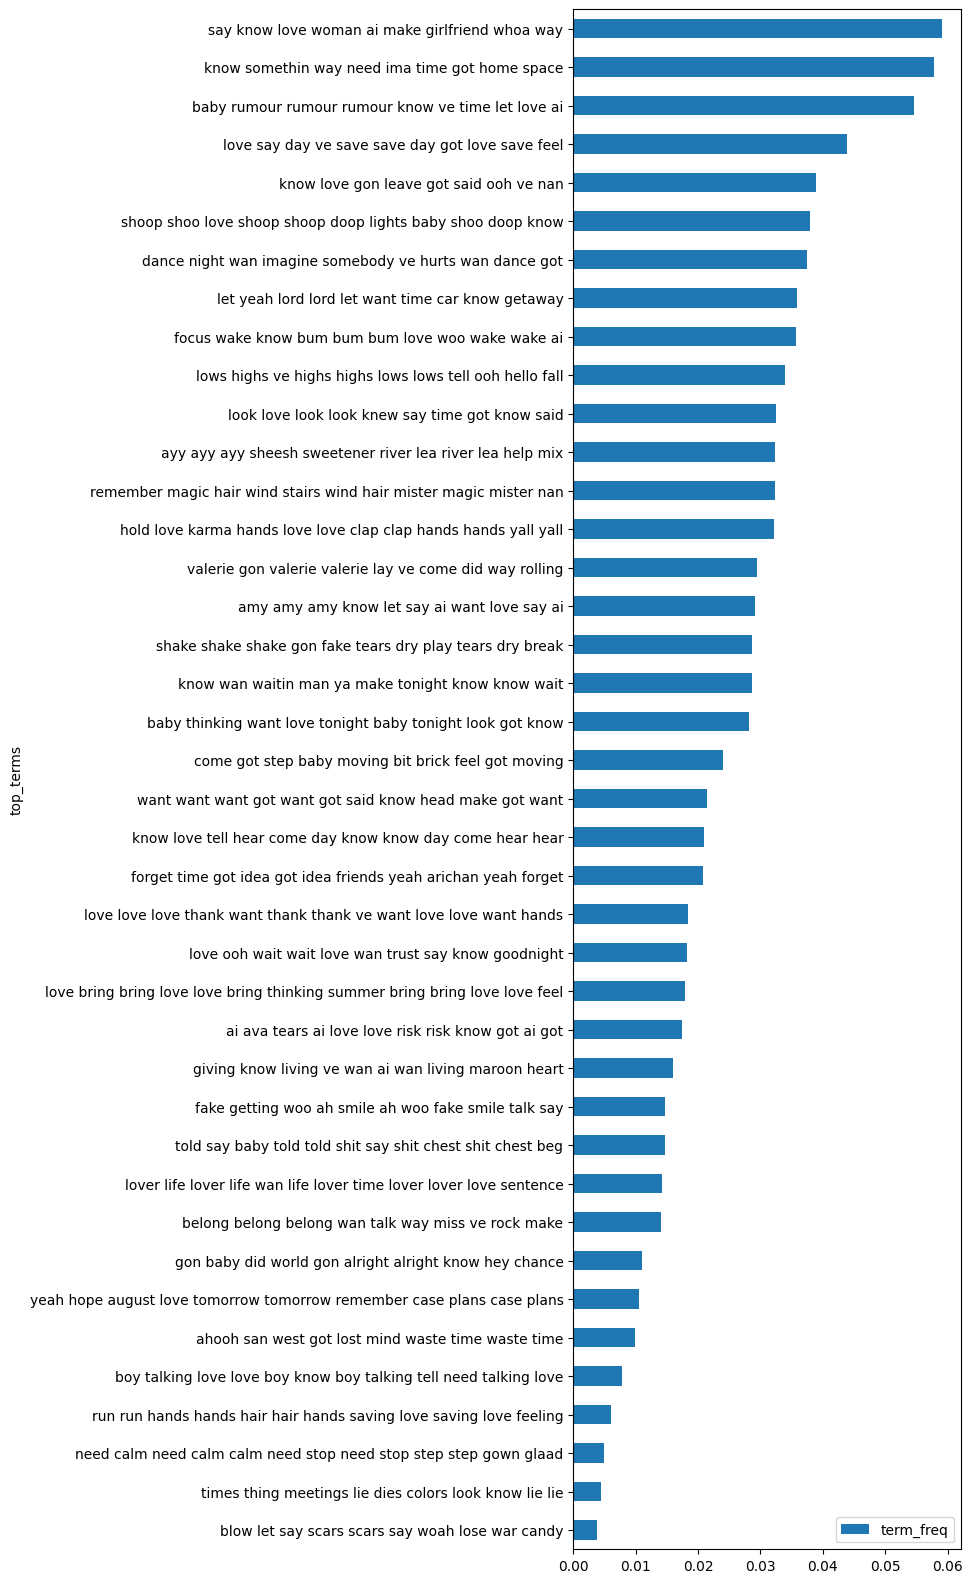

In [70]:
TOPICS.sort_values('term_freq', ascending=True).plot.barh(y='term_freq', x='top_terms', figsize=(5, n_topics/2));

In [118]:
THETA = THETA.reset_index().set_index('artist')

In [121]:
#LIB = LIB.set_index('artist')
LIB

,nationality,genre,decade_of_prominence,birth_year,instruments,character_count,decade_key
artist,,,,,,,
ADELE,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']",76812,2010s
AMY WINEHOUSE,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']",52459,2000s
ARIANA GRANDE,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']",89008,2010s
BEYONCE,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783,2000s
CYNDI LAUPER,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669,1980s
DOLLY PARTON,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805,1970s
DUA LIPA,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067,2020s
LAURYN HILL,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809,1990s
PINK,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059,2000s


In [122]:
LIB['decade_key'] = LIB.decade_of_prominence.str.split(', ').str[0].str.lower()

In [123]:
DECADES = sorted(LIB.decade_key.value_counts().index.to_list())

In [124]:
TOPICS[DECADES] = THETA.join(LIB).groupby('decade_key')[TNAMES].mean().T

In [126]:
TOPICS.head()

,top_terms,doc_weight_sum,term_freq,mean_document_weight,1970s,1980s,1990s,2000s,2010s,2020s
topic_id,,,,,,,,,,
T00,ayy ayy ayy sheesh sweetener river lea river l...,12.864404,0.032362,0.027966,0.022635,0.022287,0.037310,0.030570,0.031673,0.014531
T01,love ooh wait wait love wan trust say know goo...,8.926963,0.018203,0.019406,0.027140,0.018241,0.015571,0.014587,0.024852,0.027031
T02,shake shake shake gon fake tears dry play tear...,10.175505,0.028598,0.022121,0.051914,0.010371,0.015571,0.029693,0.013015,0.014531
T03,ahooh san west got lost mind waste time waste ...,9.021721,0.009855,0.019612,0.035915,0.034391,0.022817,0.010831,0.012743,0.022865
T04,ai ava tears ai love love risk risk know got a...,9.923295,0.017390,0.021572,0.027140,0.013200,0.039121,0.013769,0.035614,0.014531


### Adding metadata to this column for further use

In [159]:
TOPICS['topic_year_dom'] = TOPICS[DECADES].idxmax(axis=1)

In [161]:
TOPICS

,top_terms,doc_weight_sum,term_freq,mean_document_weight,1970s,1980s,1990s,2000s,2010s,2020s,topic_year_dom
topic_id,,,,,,,,,,,
T00,ayy ayy ayy sheesh sweetener river lea river l...,12.864404,0.032362,0.027966,0.022635,0.022287,0.037310,0.030570,0.031673,0.014531,1990s
T01,love ooh wait wait love wan trust say know goo...,8.926963,0.018203,0.019406,0.027140,0.018241,0.015571,0.014587,0.024852,0.027031,1970s
T02,shake shake shake gon fake tears dry play tear...,10.175505,0.028598,0.022121,0.051914,0.010371,0.015571,0.029693,0.013015,0.014531,1970s
T03,ahooh san west got lost mind waste time waste ...,9.021721,0.009855,0.019612,0.035915,0.034391,0.022817,0.010831,0.012743,0.022865,1970s
T04,ai ava tears ai love love risk risk know got a...,9.923295,0.017390,0.021572,0.027140,0.013200,0.039121,0.013769,0.035614,0.014531,1990s
T05,told say baby told told shit say shit chest sh...,7.714081,0.014679,0.016770,0.013626,0.018030,0.026440,0.007837,0.024081,0.027031,2020s
T06,run run hands hands hair hair hands saving lov...,7.020343,0.006140,0.015262,0.013626,0.014147,0.026440,0.016320,0.009519,0.014531,1990s
T07,look love look look knew say time got know said,15.697957,0.032492,0.034126,0.013626,0.032463,0.033687,0.034459,0.045080,0.031198,2010s
T08,know love tell hear come day know know day com...,15.603362,0.020896,0.033920,0.065428,0.032348,0.026440,0.036423,0.024519,0.027031,1970s


In [162]:
LIB_WITH_TOPICS = TOPICS.copy()
csv_file = 'topics_with_lib.csv'
LIB_WITH_TOPICS.to_csv(csv_file)

In [127]:
TOPICS[DECADES + ['top_terms']].style.background_gradient(cmap=colors, axis=None)

,1970s,1980s,1990s,2000s,2010s,2020s,top_terms
topic_id,,,,,,,
T00,0.022635,0.022287,0.037310,0.030570,0.031673,0.014531,ayy ayy ayy sheesh sweetener river lea river lea help mix
T01,0.027140,0.018241,0.015571,0.014587,0.024852,0.027031,love ooh wait wait love wan trust say know goodnight
T02,0.051914,0.010371,0.015571,0.029693,0.013015,0.014531,shake shake shake gon fake tears dry play tears dry break
T03,0.035915,0.034391,0.022817,0.010831,0.012743,0.022865,ahooh san west got lost mind waste time waste time
T04,0.027140,0.013200,0.039121,0.013769,0.035614,0.014531,ai ava tears ai love love risk risk know got ai got
T05,0.013626,0.018030,0.026440,0.007837,0.024081,0.027031,told say baby told told shit say shit chest shit chest beg
T06,0.013626,0.014147,0.026440,0.016320,0.009519,0.014531,run run hands hands hair hair hands saving love saving love feeling
T07,0.013626,0.032463,0.033687,0.034459,0.045080,0.031198,look love look look knew say time got know said
T08,0.065428,0.032348,0.026440,0.036423,0.024519,0.027031,know love tell hear come day know know day come hear hear


In [128]:
TOPICS[DECADES + ['top_terms']].sort_values('2020s', ascending=False)\
    .style.background_gradient(cmap=colors, axis=None)

,1970s,1980s,1990s,2000s,2010s,2020s,top_terms
topic_id,,,,,,,
T24,0.013626,0.009014,0.015571,0.015459,0.001555,0.047865,need calm need calm calm need stop need stop step step gown glaad
T13,0.054167,0.039379,0.026440,0.022675,0.035701,0.047718,love love love thank want thank thank ve want love love want hands
T21,0.013626,0.071904,0.026440,0.027610,0.035014,0.043698,dance night wan imagine somebody ve hurts wan dance got
T34,0.022635,0.012101,0.022817,0.019718,0.005300,0.043698,times thing meetings lie dies colors look know lie lie
T28,0.036149,0.043269,0.015571,0.038514,0.025401,0.043698,shoop shoo love shoop shoop doop lights baby shoo doop know
T17,0.013626,0.015057,0.026440,0.040679,0.012655,0.039531,want want want got want got said know head make got want
T33,0.031644,0.015061,0.015571,0.022747,0.046977,0.039531,lows highs ve highs highs lows lows tell ooh hello fall
T10,0.031644,0.009688,0.030788,0.016677,0.001555,0.035365,blow let say scars scars say woah lose war candy
T09,0.022635,0.046561,0.015571,0.041075,0.055940,0.033281,know somethin way need ima time got home space


In [129]:
TOPICS[DECADES + ['top_terms']].sort_values('2010s', ascending=False)\
    .style.background_gradient(cmap=colors, axis=None)

,1970s,1980s,1990s,2000s,2010s,2020s,top_terms
topic_id,,,,,,,
T32,0.013626,0.019135,0.015571,0.025689,0.081078,0.014531,say know love woman ai make girlfriend whoa way
T30,0.013626,0.005928,0.015571,0.025539,0.062962,0.027031,amy amy amy know let say ai want love say ai
T09,0.022635,0.046561,0.015571,0.041075,0.055940,0.033281,know somethin way need ima time got home space
T20,0.013626,0.031871,0.053976,0.019750,0.048519,0.014531,let yeah lord lord let want time car know getaway
T33,0.031644,0.015061,0.015571,0.022747,0.046977,0.039531,lows highs ve highs highs lows lows tell ooh hello fall
T07,0.013626,0.032463,0.033687,0.034459,0.045080,0.031198,look love look look knew say time got know said
T19,0.013626,0.050338,0.026440,0.027989,0.037984,0.027031,baby rumour rumour rumour know ve time let love ai
T38,0.013626,0.005928,0.048179,0.025527,0.037511,0.014531,valerie gon valerie valerie lay ve come did way rolling
T13,0.054167,0.039379,0.026440,0.022675,0.035701,0.047718,love love love thank want thank thank ve want love love want hands


In [130]:
TOPICS[DECADES + ['top_terms']].sort_values('1990s', ascending=False)\
    .style.background_gradient(cmap=colors, axis=None)

,1970s,1980s,1990s,2000s,2010s,2020s,top_terms
topic_id,,,,,,,
T20,0.013626,0.031871,0.053976,0.019750,0.048519,0.014531,let yeah lord lord let want time car know getaway
T15,0.047410,0.018274,0.048179,0.023227,0.001555,0.014531,yeah hope august love tomorrow tomorrow remember case plans case plans
T38,0.013626,0.005928,0.048179,0.025527,0.037511,0.014531,valerie gon valerie valerie lay ve come did way rolling
T11,0.013626,0.005928,0.043832,0.025711,0.023609,0.014531,fake getting woo ah smile ah woo fake smile talk say
T04,0.027140,0.013200,0.039121,0.013769,0.035614,0.014531,ai ava tears ai love love risk risk know got ai got
T31,0.040653,0.019617,0.037310,0.021658,0.017337,0.027031,love bring bring love love bring thinking summer bring bring love love feel
T00,0.022635,0.022287,0.037310,0.030570,0.031673,0.014531,ayy ayy ayy sheesh sweetener river lea river lea help mix
T07,0.013626,0.032463,0.033687,0.034459,0.045080,0.031198,look love look look knew say time got know said
T10,0.031644,0.009688,0.030788,0.016677,0.001555,0.035365,blow let say scars scars say woah lose war candy


In [131]:
TOPICS[DECADES + ['top_terms']].sort_values('2000s', ascending=False)\
    .style.background_gradient(cmap=colors, axis=None)

,1970s,1980s,1990s,2000s,2010s,2020s,top_terms
topic_id,,,,,,,
T18,0.031877,0.025882,0.026440,0.054979,0.016443,0.014531,know love gon leave got said ooh ve nan
T09,0.022635,0.046561,0.015571,0.041075,0.055940,0.033281,know somethin way need ima time got home space
T17,0.013626,0.015057,0.026440,0.040679,0.012655,0.039531,want want want got want got said know head make got want
T28,0.036149,0.043269,0.015571,0.038514,0.025401,0.043698,shoop shoo love shoop shoop doop lights baby shoo doop know
T14,0.013626,0.017466,0.026440,0.036910,0.013129,0.027031,know wan waitin man ya make tonight know know wait
T08,0.065428,0.032348,0.026440,0.036423,0.024519,0.027031,know love tell hear come day know know day come hear hear
T07,0.013626,0.032463,0.033687,0.034459,0.045080,0.031198,look love look look knew say time got know said
T00,0.022635,0.022287,0.037310,0.030570,0.031673,0.014531,ayy ayy ayy sheesh sweetener river lea river lea help mix
T36,0.013626,0.005928,0.015571,0.030185,0.034969,0.014531,forget time got idea got idea friends yeah arichan yeah forget


# -------------------------------------------------------

In [138]:
DOCS

doc_str  \
artist          song                                                                          
ADELE           All I Ask                 ve been said know do play pretend re scared is...   
                Best for Last             s been open yours baby come m trying tell like...   
                Can I Get It              beg steal borrow make make heart home throw wa...   
                Chasing Pavements         m am do need look ai know is tell world say wa...   
                Cold Shoulder             say s head things think do make sense been do ...   
...                                                                                     ...   
WHITNEY HOUSTON Who Would Imagine a King  grow be anything imagine king shepherd teacher...   
                Why Does It Hurt So Bad   thought was keep crying do love does hurt thou...   
                You Give Good Love        found ve been missing always run ve been looki...   
                You Light Up My Life      dreams kept dark ve come light life give hope ...   
                You Were Loved            wants chance be someone have dreams need dream...   

                                          term_count  
artist          song                                  
ADELE           All I Ask                         97  
                Best for Last                    253  
                Can I Get It                      77  
                Chasing Pavements                 93  
                Cold Shoulder                    110  
...                                              ...  
WHITNEY HOUSTON Who Would Imagine a King          32  
                Why Does It Hurt So Bad          201  
                You Give Good Love               134  
                You Light Up My Life              78  
                You Were Loved                   144  

[460 rows x 2 columns]

In [139]:
csv_file = 'docs.csv'
DOCS.to_csv(csv_file)

# -------------------------------------------------------

## PHI TABLE - PCA